In [63]:
# --- about
# this file calls bootstrap() in spectra_ml to run bootstrap runs

In [64]:
# --- set up 

# local
import spectra_ml     #make sure path is specified in computer
from spectra_ml import metrics

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv

# for Set working folder, etc.
import os
import os.path


In [65]:
# --- put spectrum files into variables

# turn files into lists and cut off first line
# put into database "spectra"
# turn deleted points (flagged as -1.23e+34) into 0's
# label spectra with datafile titles


# - init spectra and class databases
datafolder = "C:/Users/Bonita/Documents/GitHub/spectra-ml/data/dataset3"
num_samples = len([name for name in os.listdir(datafolder) if \
                   os.path.isfile(os.path.join(datafolder,name))])
# test code 
# print(num_samples)

spectrum_len = 480                                 # 480 >= the BECK spectrometer spectrum length
spectra = np.zeros((num_samples,spectrum_len))
spectrum_categories = np.zeros(num_samples)
first_record_of_mixtures_chapter = 11602
is_a_mineral = 1                                   # these numbers match the chapter numbers given by usgs
is_a_mixture = 2
spectrum_names = ["" for x in range(num_samples)]

y = np.zeros((num_samples, 1))


# - fill databases
i = 0

# find spectra folder
os.chdir(datafolder)

# - etl the data
# - create a spectrum_names string matrix for populating the plot legends
# - find record number for identifying mixtures, which will be plotted in thicker lines
for filename in os.listdir(datafolder):
    
    # read file
    file_object  = open(filename, 'r').readlines()
    # strip off header, add to matrix 'spectra'
    spectra[i,:] = file_object[1:]                  
    
    # find file header
    file_header = file_object[0]             
                                        
    # make spectrum_names matrix to label spectra in the plot legends
    spectrum_names[i] = file_header
    
    # categorize spectrum as mineral or mixture:
    # find record number in the header 
    # change from string to integer
    # use it to identify and label minerals versus mixtures
    # (minerals are records <=first_record_of_mixtures_chapter)
    # (see report pg 3 from https://pubs.er.usgs.gov/publication/ds1035 
    # ...for list of categories, 'chapters')
    # (*will need to update if we want to use and categorize spectra from other categories)
    # store category in spectra_category
    ####
    start = 'Record='
    end = ':'
    record_number = int((file_header.split(start))[1].split(end)[0])
    # print(record_number)
    if record_number < first_record_of_mixtures_chapter:
        spectrum_categories[i] = is_a_mineral
    else:
        spectrum_categories[i] = is_a_mixture
        
    # testcode
    # print('record_number: ', record_number)
    
    # testcode
    # print(spectrum_categories)
    
    # testcode
    # print(file_header)
    
    # label spectrum class, based on header
    # actinolite: 0, alunite: 1, chlorite: 2
    if file_header.find('Actinolite',)!= -1: #if material name contains actinolite
        y[i,0] = 0
    elif file_header.find('Alun',)!= -1:
        y[i,0] = 1
    else:                                       #chlorite
        y[i,0] = 2         
               
    # turn deleted points into 0
    for j in range(spectrum_len):  
        if spectra[i,j] <0:
            spectra[i,j]=0                          
    i+=1

# test code
# print(y[:])
# print(spectra[0:2,0])

#print(type(spectra))
#print(type(y))

# convert to dataframes
#spectra = pd.DataFrame(spectra)
#y = pd.DataFrame(y)

#print(y.at[0,0])
#print(y[0,0])
#print(y.shape)

In [66]:
# --- 'backwards compatibility'

raw_spectra = spectra
raw_labels = y
raw_len = spectrum_len

In [67]:
# --- implement standardized data

# set folder
std_datafolder = "C:/Users/Bonita/Documents/GitHub/spectra-ml/data/ASCIIdata_splib07a/ASCIIdata_splib07a.standardized"
os.chdir(std_datafolder)

# y

metadata_file  = 'spectra-metadata.csv'
labels_data = open(metadata_file, 'r').readlines()

# spectra


In [68]:
itrain,idev,itest = spectra_ml.metrics.split(num_samples)
train_population_indices = itrain
dev_population_indices = idev
test_population_indices = itest

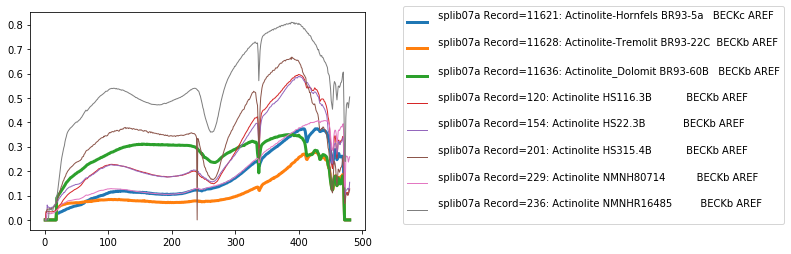

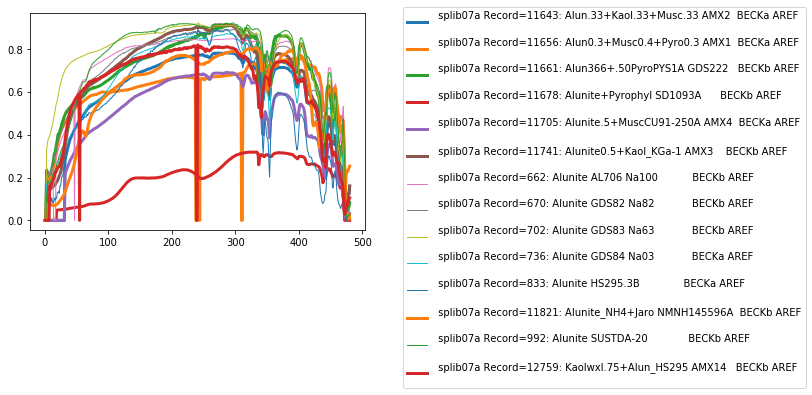

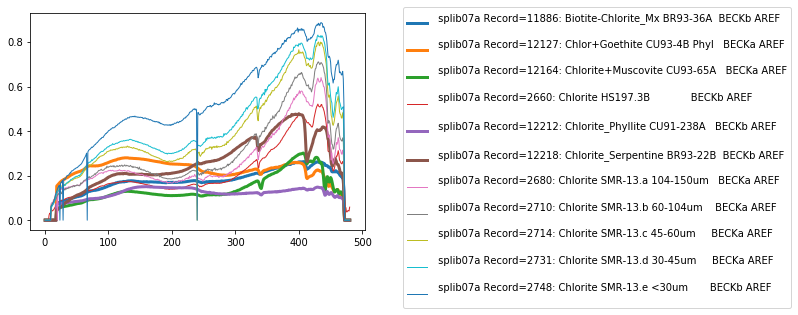

In [69]:
# --- plot the classes

# plot each class in a separate plot
# plot spectra names in legend
# plot minerals and mixtures w diff line widths

# variables
num0 = 0 #number of samples of class 0
num1 = 0
num2 = 0

mineral_linewidth = 1         # linewidth = 1 is default
mixture_linewidth = 3         

# count the number of each class to make spectra0, spectra1, spectra2 databases
for i in range(num_samples):
    if y[i,0]== 0:
        num0 += 1
    elif y[i,0]== 1:
        num1 += 1
    elif y[i,0]== 2:
        num2 += 1

# make class-specific databases spectra0, ...1, ...2
spectra0 = np.zeros((num0,spectrum_len)) 
spectra1 = np.zeros((num1,spectrum_len)) 
spectra2 = np.zeros((num2,spectrum_len)) 

labels0 = ["" for x in range(num0)]
labels1 = ["" for x in range(num1)]
labels2 = ["" for x in range(num2)]

linewidth0 = np.zeros(num0)
linewidth1 = np.zeros(num1)
linewidth2 = np.zeros(num2)


# make counters for each database to place spectra
i0 = 0
i1 = 0
i2 = 0

# set linewidth for the spectrum 
# populate class-specific databases spectra0, ...1, ...2
for i in range(num_samples):
    
    # set linewidth
    #testcode
    #print(spectrum_categories)
    #print(spectrum_categories[i])
    
    if spectrum_categories[i] == is_a_mineral:
        linewidth = mineral_linewidth
        
        #testcode
        #print('min')
    else: 
        linewidth = mixture_linewidth
        
        #testcode
        #print('mix')
    
    # populate matrices for making each class plot
    if y[i,0]== 0:
        spectra0[i0,:] = spectra[i,:]
        labels0[i0] = spectrum_names[i]
        linewidth0[i0] = linewidth
        i0 +=1
    elif y[i,0]== 1:
        spectra1[i1,:] = spectra[i,:]
        labels1[i1] = spectrum_names[i]
        linewidth1[i1] = linewidth
        i1 +=1
    else:
        spectra2[i2,:] = spectra[i,:]
        labels2[i2] = spectrum_names[i]
        linewidth2[i2] = linewidth
        i2 +=1

# plot each class-specific database separately
for i in range(i0):
    plt.plot(range(1, spectrum_len+1), spectra0[i,:], label = labels0[i], linewidth = linewidth0[i])
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

for i in range(i1):
    plt.plot(range(1, spectrum_len+1), spectra1[i,:], label = labels1[i], linewidth = linewidth1[i])
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

for i in range(i2):
    plt.plot(range(1, spectrum_len+1), spectra2[i,:], label = labels2[i], linewidth = linewidth2[i])
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()  

In [70]:
# --- classplot(spectra, labels)

# plot each class in a separate plot
# plot spectra names in legend
# plot minerals and mixtures w diff line widths

def classplot(spectradata, labels, legend_names):

    # variables
    y = labels
    spectra = spectradata
    spectrum_names = legend_names            
    num_samples = len(spectra)
    
    num0 = 0 #number of samples of class 0
    num1 = 0
    num2 = 0

    mineral_linewidth = 1         # linewidth = 1 is default
    mixture_linewidth = 3         

    # count the number of each class to make spectra0, spectra1, spectra2 databases
    for i in range(num_samples):
        if y[i,0]== 0:
            num0 += 1
        elif y[i,0]== 1:
            num1 += 1
        elif y[i,0]== 2:
            num2 += 1

    # make class-specific databases spectra0, ...1, ...2
    spectra0 = np.zeros((num0,spectrum_len)) 
    spectra1 = np.zeros((num1,spectrum_len)) 
    spectra2 = np.zeros((num2,spectrum_len)) 

    labels0 = ["" for x in range(num0)]
    labels1 = ["" for x in range(num1)]
    labels2 = ["" for x in range(num2)]

    linewidth0 = np.zeros(num0)
    linewidth1 = np.zeros(num1)
    linewidth2 = np.zeros(num2)


    # make counters for each database to place spectra
    i0 = 0
    i1 = 0
    i2 = 0

    # set linewidth for the spectrum 
    # populate class-specific databases spectra0, ...1, ...2
    for i in range(num_samples):

        # set linewidth
        #testcode
        #print(spectrum_categories)
        #print(spectrum_categories[i])

        if spectrum_categories[i] == is_a_mineral:
            linewidth = mineral_linewidth

            #testcode
            #print('min')
        else: 
            linewidth = mixture_linewidth

            #testcode
            #print('mix')

        # populate matrices for making each class plot
        if y[i,0]== 0:
            spectra0[i0,:] = spectra[i,:]
            labels0[i0] = spectrum_names[i]
            linewidth0[i0] = linewidth
            i0 +=1
        elif y[i,0]== 1:
            spectra1[i1,:] = spectra[i,:]
            labels1[i1] = spectrum_names[i]
            linewidth1[i1] = linewidth
            i1 +=1
        else:
            spectra2[i2,:] = spectra[i,:]
            labels2[i2] = spectrum_names[i]
            linewidth2[i2] = linewidth
            i2 +=1

    # plot each class-specific database separately
    for i in range(i0):
        plt.plot(range(1, spectrum_len+1), spectra0[i,:], label = labels0[i], linewidth = linewidth0[i])
    plt.legend(bbox_to_anchor=(1.1, 1.05))
    plt.show()

    for i in range(i1):
        plt.plot(range(1, spectrum_len+1), spectra1[i,:], label = labels1[i], linewidth = linewidth1[i])
    plt.legend(bbox_to_anchor=(1.1, 1.05))
    plt.show()

    for i in range(i2):
        plt.plot(range(1, spectrum_len+1), spectra2[i,:], label = labels2[i], linewidth = linewidth2[i])
    plt.legend(bbox_to_anchor=(1.1, 1.05))
    plt.show()  

In [71]:
# --- test model 
# aggregate

# test once each on dev and test set
# model will be trained on the whole train population
# (test cell comes before bootstrap cell bc bootstrap takes much longer)

# make train, dev and test sets
train_set = spectra[train_population_indices, :]
train_set_labels = y[train_population_indices, :]
train_set_names = ["" for x in range(len(train_set))]
for i in range(len(train_population_indices)): 
    train_set_names[i] = spectrum_names[train_population_indices[i]]
    
dev_set = spectra[dev_population_indices, :]
dev_set_labels = y[dev_population_indices,:]
dev_set_names = ["" for x in range(len(dev_set))]
for i in range(len(dev_population_indices)): 
    dev_set_names[i] = spectrum_names[dev_population_indices[i]]
    
test_set = spectra[test_population_indices, :]
test_set_labels = y[test_population_indices, :]
test_set_names = ["" for x in range(len(test_set))]
for i in range(len(test_population_indices)): 
    test_set_names[i] = spectrum_names[test_population_indices[i]]

# train, validate and test model
num_epochs = 40

model = keras.Sequential([
    keras.layers.Dense(200, activation=tf.nn.relu),
    keras.layers.Dense(200, activation=tf.nn.relu),
    keras.layers.Dense(3, activation=tf.nn.softmax)
])

# compile
model.compile(optimizer=tf.train.AdamOptimizer(), 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

# train
History = model.fit(train_set, train_set_labels, epochs=num_epochs)

epoch_accs = History.history['acc']
train_acc = epoch_accs[num_epochs-1]   #record final epoch, plain nn train result, acc[...]), for each run

# test on dev set
dev_loss, dev_acc = model.evaluate(dev_set, dev_set_labels)

# test on test set
test_loss, test_acc = model.evaluate(test_set, test_set_labels)
    
# see and save results
print(train_acc, dev_acc)


Epoch 1/40
21/21 [==============================] - 1s 25ms/step - loss: 1.3440 - acc: 0.3333
Epoch 2/40
21/21 [==============================] - 0s 0us/step - loss: 0.8994 - acc: 0.6190
Epoch 3/40
21/21 [==============================] - 0s 0us/step - loss: 0.8807 - acc: 0.3810
Epoch 4/40
21/21 [==============================] - 0s 0us/step - loss: 0.8520 - acc: 0.5238
Epoch 5/40
21/21 [==============================] - 0s 744us/step - loss: 0.7777 - acc: 0.5714
Epoch 6/40
21/21 [==============================] - 0s 0us/step - loss: 0.7321 - acc: 0.6667
Epoch 7/40
21/21 [==============================] - 0s 744us/step - loss: 0.7137 - acc: 0.7143
Epoch 8/40
21/21 [==============================] - 0s 0us/step - loss: 0.6739 - acc: 0.8095
Epoch 9/40
21/21 [==============================] - 0s 745us/step - loss: 0.6312 - acc: 0.8571
Epoch 10/40
21/21 [==============================] - 0s 0us/step - loss: 0.6055 - acc: 0.8095
Epoch 11/40
21/21 [==============================] - 0s 744us/

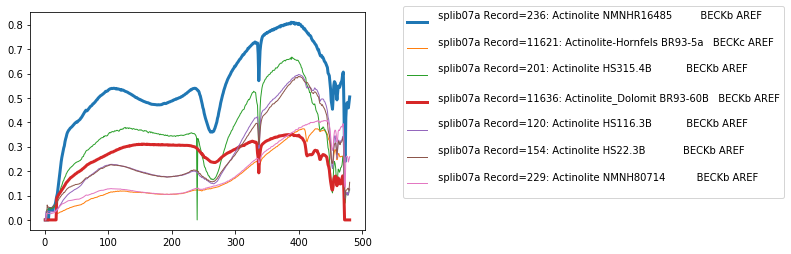

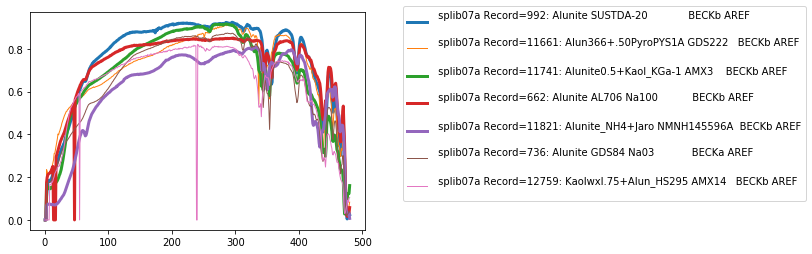

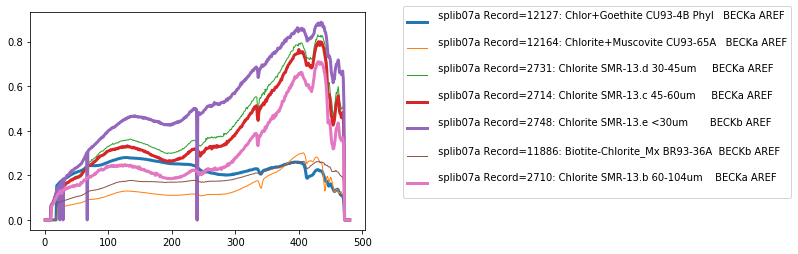

No handles with labels found to put in legend.


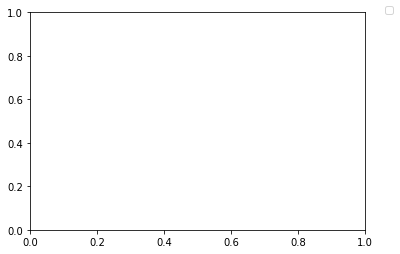

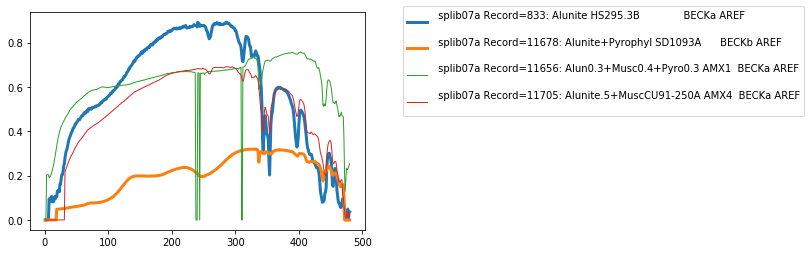

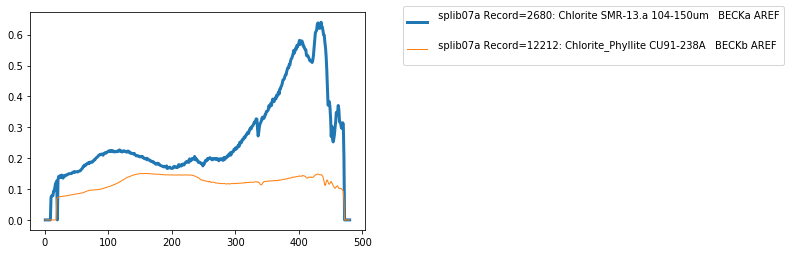

In [72]:
# plot the train and dev data

classplot(train_set, train_set_labels, train_set_names)
classplot(dev_set, dev_set_labels, dev_set_names)

# comment
# to plot all classes as before, 
# use:
# classplot(spectra, y)

In [73]:
# run bootstrap

# bootstrap works by sampling with replacement from the train population to generate train sets 
# it then fits a model to each of the new sets
# and prints out some stats about the average and standard deviation of the bootstrap models' performance

# reference: elements of statistical learning by hastie, tibshirani, friedman (free textbook)

In [74]:
# use bootstrap(model, data, data_labels, num_epochs)
num_bootstrap_runs = 5
bresults_module = spectra_ml.metrics.bootstrap(model, spectra, y, num_bootstrap_runs)
print(b_results_module)

NameError: name 'num_bootstrap_runs' is not defined

In [ ]:
# --- initialize bootstrap variables
# note:
#train_set_size = train_population_size
#dev_set_size = dev_population_size
#test_set_size = test_population_size

num_bootstrap_runs = 5

num_model_types = 1                                 #plain nn (this is here because originally two models, nn and ica)
num_tests_per_model = 2                             #train and dev accuracy 
num_tests = num_model_types*num_tests_per_model
num_metrics_per_test = 2                                  #accuracy mean and var

bresults = np.zeros((num_tests, num_bootstrap_runs))

itrainnn = 0        #index in bresults of the train nn results
idevnn = 1

In [ ]:
# --- bootstrap loop

# -select bootstrap sets
# -run algorithm
# -repeat num_bootstrap_runs times
# -collect mean and variance of nn train, nn dev, ica train, ica test accuracies and store in bstatsfor run in range(num_bootstrap_runs):

for run in range(num_bootstrap_runs):
    # - bootstrap sample the populations to make sets
    # make train, dev, and test sets from their respective populations

    # draw with replacement from the train population
    # make the validation and test sets the same as their populations
    train_set_indices = random.choices(train_population_indices, k=train_set_size)
    dev_set_indices = dev_population_indices
    test_set_indices = test_population_indices

    # make train and test sets
    train_set = spectra[train_set_indices, :]
    train_set_labels = y[train_set_indices, :]
    dev_set = spectra[dev_set_indices, :]
    dev_set_labels = y[dev_set_indices,:]
    test_set = spectra[test_set_indices, :]
    test_set_labels = y[test_set_indices, :]    
    
    # use model from test cell
    
    # train
    History = model.fit(train_set, train_set_labels, epochs=num_epochs)

    acc = History.history['acc']
    bresults[itrainnn, run] = acc[num_epochs-1]   #record final epoch, plain nn train result, acc[...]), for each run
    
    #testcode
    #print(bruns)    # --- test plain nn on dev set

    # test on dev set
    dev_loss, dev_acc = model.evaluate(dev_set, dev_set_labels)

    bresults[idevnn,run] = dev_acc
    

    
   

In [ ]:
# --- bootstrap stats
#print(run)
print(bresults)

num_stats = 2           #mean and var
bstats = np.zeros((num_stats, num_tests)) #num_tests is train and dev accuracy
imean = 0               #row index of means
istd = 1

for test in range(num_tests):
    bstats[imean,test] = np.mean(bresults[test,:])    
    bstats[istd,test] = np.std(bresults[test,:])

print(bstats)

In [ ]:
# --- calculate bootstrap confidence interval 

# ci
sigma = 2          # 2 sigma is 95% CI, 3 sigma is 99% CI
ci = np.zeros((num_tests, 3))  # 3 columns: display 2 CI bounds, lower and upper, plus sigma
ilow =0                        # indices of the low, high ci bounds and sigma
ihigh=1
isig=2

for test in range(num_tests):
    ci[test, ilow] = bstats[imean,test] - (bstats[istd,test]*sigma)
    ci[test, ihigh] = bstats[imean,test] + (bstats[istd,test]*sigma)
    ci[test,sigma] = sigma
    
print(ci)

In [ ]:
# bootstrap histogram

plt.hist(bresults[itrainnn, :])
plt.title('Distribution of the bootstrap train accuracies')
plt.show()

plt.hist(bresults[idevnn, :])
plt.title('Distribution of the bootstrap validation accuracies')
plt.show()

In [ ]:
# --- kfold cross validation